# Census Income Project

The prediction task is to determine whether a person makes over $50K a year.

In [87]:
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [88]:
df=pd.read_csv('census_income.csv')

In [89]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [90]:
df.shape

(32560, 15)

There are 32560 rows and 15 columns

In [91]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [92]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

Target variable has two unique values and thus is a classification problem

In [93]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null values in any column

In [94]:
df.describe()


,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The min age is 17 years and max is 90 years.Also there are many outliers in capital_gain and Capital_loss column.

In [95]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [96]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

Data seems to be imbalanced.

In [97]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

This column has some value as ? which needs to be replaced.

In [98]:
df['Fnlwgt'].value_counts()

123011    13
203488    13
164190    13
121124    12
148995    12
          ..
68318      1
284211     1
312881     1
177711     1
229376     1
Name: Fnlwgt, Length: 21647, dtype: int64

In [99]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [100]:
df['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

In [101]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [102]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

This column has some value as ? which needs to be replaced.

In [103]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [104]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [105]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [106]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [107]:
df['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: Capital_gain, Length: 119, dtype: int64

In [108]:
df['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: Capital_loss, Length: 92, dtype: int64

In [109]:
df['Hours_per_week'].value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: Hours_per_week, Length: 94, dtype: int64

In [110]:
df['Native_country'].value_counts()


 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

This column has some value as ? which needs to be replaced.

In [111]:
df['Native_country']= df['Native_country'].str.replace( '?', 'United-States')
df['Occupation']= df['Occupation'].str.replace('?', 'Prof-specialty')
df['Workclass']= df['Workclass'].str.replace('?', 'Private')

All three columns with ? were relaced by mode of that column.

In [112]:
df['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [113]:
df['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [114]:
df['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [115]:
#replace income category into 0 and 1
df['Income']= df['Income'].str.replace('<=50K', '0')

In [116]:
df['Income']= df['Income'].str.replace('>50K', '1')

values in Income column was replaced by 0 and 1 

In [117]:
df['Income'].head(10)

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
Name: Income, dtype: object

<AxesSubplot:xlabel='Income', ylabel='count'>

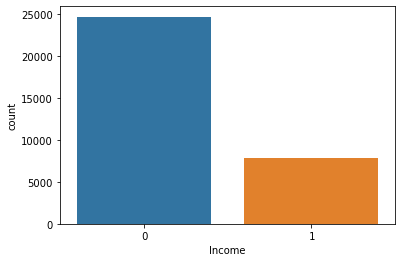

In [118]:
sb.countplot(df['Income'])

The population of people below 50K were more.

In [119]:
df1=df.copy()

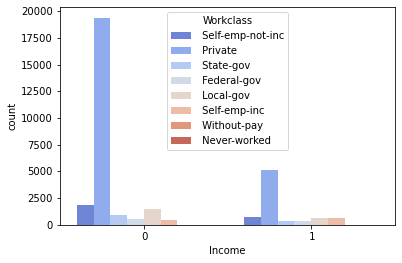

In [121]:
#Relationship of categorical columns with target variable
sb.countplot(df['Income'], palette='coolwarm', hue='Workclass',data=df);


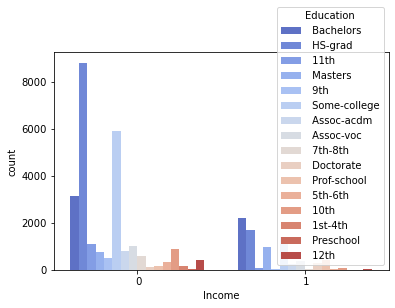

In [123]:
sb.countplot(df['Income'], palette='coolwarm', hue='Education',data=df);

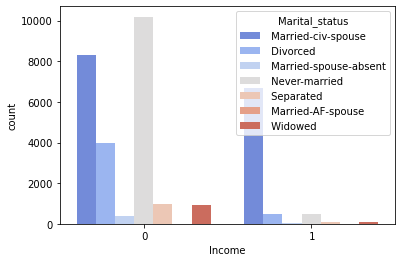

In [124]:
sb.countplot(df['Income'], palette='coolwarm', hue='Marital_status',data=df);

Divorced and never-married citizens were present more in 'below 50k' category.

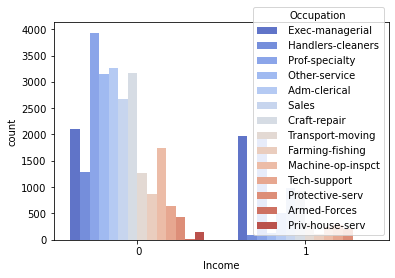

In [125]:
sb.countplot(df['Income'], palette='coolwarm', hue='Occupation',data=df);

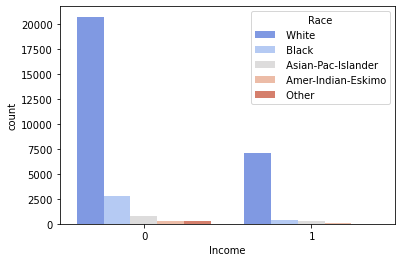

In [126]:
sb.countplot(df['Income'], palette='coolwarm', hue='Race',data=df);

White population were dominant in both the income group.

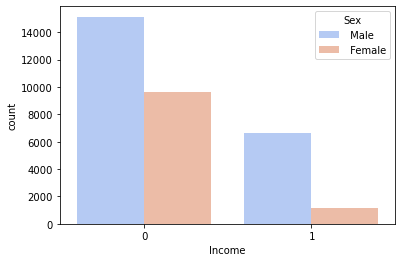

In [127]:
sb.countplot(df['Income'], palette='coolwarm', hue='Sex',data=df);

The ratio of female were less in both the income group

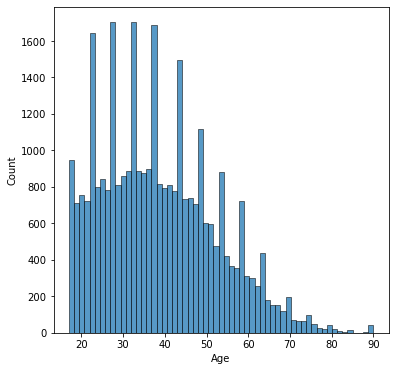

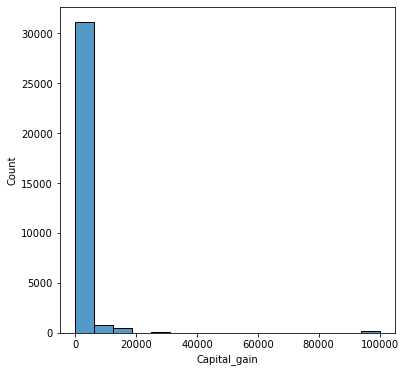

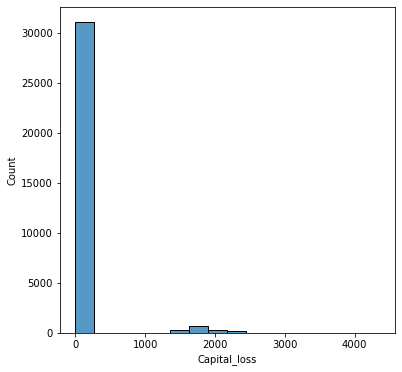

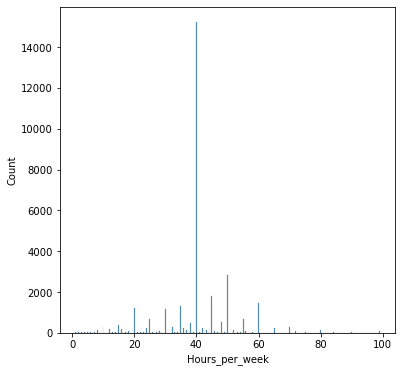

In [128]:
#for numerical features
columns=['Age','Capital_gain', 'Capital_loss','Hours_per_week']
for i in df[columns]:
    plt.figure(figsize=(6,6))
    sb.histplot(df[i])

Majority people were in the age group of 25-40, also most of the people worked for 40 hrs per week

In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
le=LabelEncoder()
list1=['Workclass', 'Education','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

All the categorical columns were transformed into numerical columns

In [131]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [137]:
df['Income']=df['Income'].astype(int)

dtype of target column was changed to 'int' type.

# Correlation

In [138]:
cor=df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,-0.010508,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.024255,0.004901,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.031496,0.002662,0.042206,-0.001646,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.063279,-0.009481
Education,-0.010508,0.004901,-0.028156,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.076062,0.079311
Education_num,0.036527,0.003445,-0.043159,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.088887,0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.021285,-0.199295
Occupation,0.001740,0.007236,0.000138,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.018028,0.009670,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,0.008922,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.021278,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.026882,-0.027349,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.002055,0.215995


Correlation was observed above.

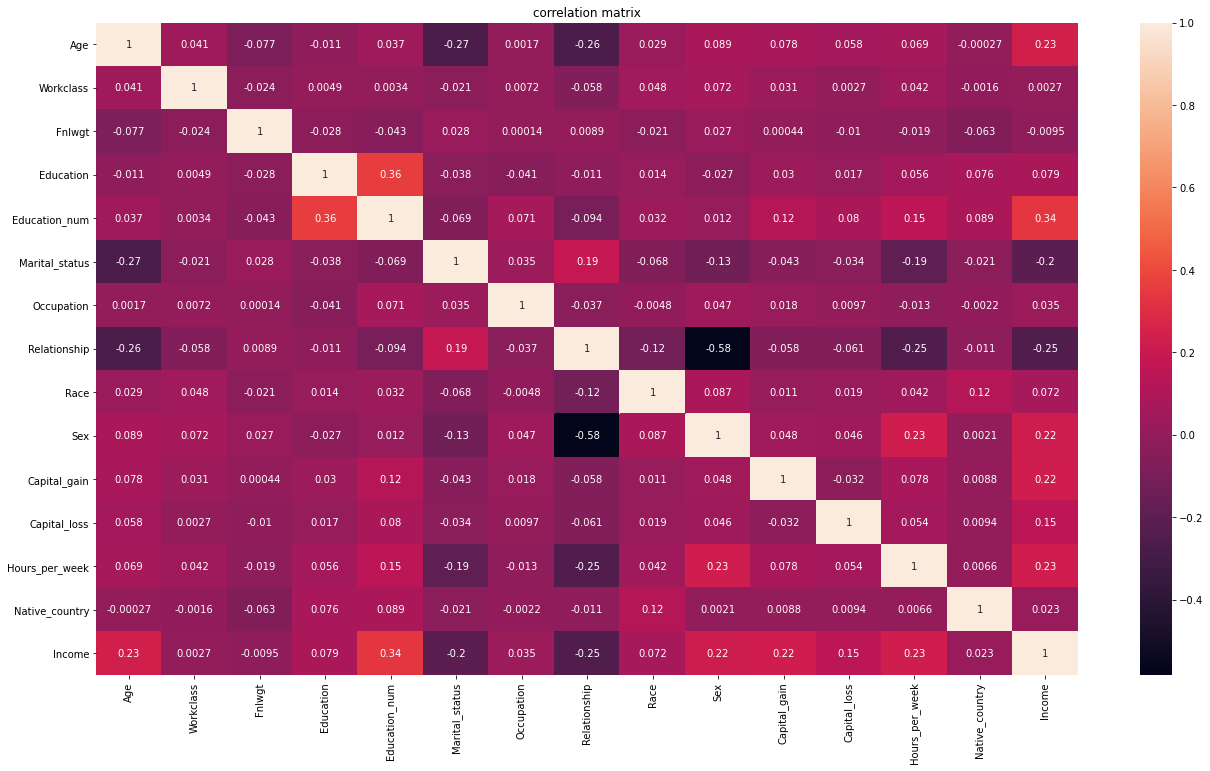

In [139]:
plt.figure(figsize=[22,12])
sb.heatmap(cor,annot=True)
plt.title('correlation matrix')
plt.show()

In [140]:
cor['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Race              0.071853
Occupation        0.034599
Native_country    0.023063
Workclass         0.002739
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

Income is positively correlated to Education_num, age, hours_per_week, sex

In [160]:
df2= df.drop(['Fnlwgt'], axis=1)


In [161]:
df2.shape

(32560, 14)

# Boxplot

<AxesSubplot:>

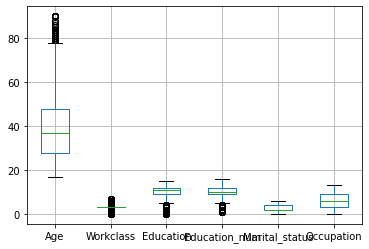

In [162]:
df2.iloc[:,0:6].boxplot()

<AxesSubplot:>

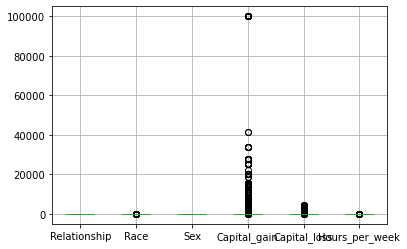

In [163]:
df2.iloc[:,6:12].boxplot()

<AxesSubplot:>

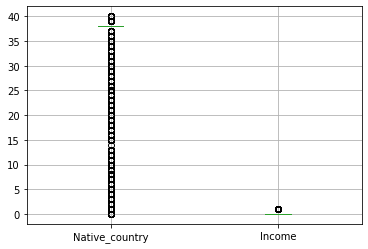

In [164]:
df2.iloc[:,12:].boxplot()

# Outlier Removal

In [165]:
from scipy.stats import zscore

In [166]:
z=np.abs(zscore(df2))
new_df=df2[(z<3).all(axis=1)]

In [167]:
df2.shape

(32560, 14)

In [168]:
new_df.shape

(28081, 14)

In [169]:
(32560-28081)*100

447900

In [170]:
447900/32560

13.756142506142506

In [171]:
x=new_df.iloc[:,0:-1]
y=new_df.iloc[:,-1]

In [173]:
x.shape, y.shape

((28081, 13), (28081,))

In [174]:
y.head(2)

0    0
1    0
Name: Income, dtype: int32

In [197]:
x.head(2)

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.887950,1.741357,-0.343479,1.213271,-0.405187,-0.775909,-0.914576,0.348789,0.712875,-0.245111,-0.037007,-2.417792,0.190366
1,-0.008841,-0.075978,0.172185,-0.439062,-1.722091,-0.275638,-0.291750,0.348789,0.712875,-0.245111,-0.037007,0.006911,0.190366


# Treating Skewness 

In [198]:
x.skew()

Age                0.487969
Workclass          0.080917
Education         -0.955233
Education_num     -0.148170
Marital_status    -0.047193
Occupation         0.015450
Relationship       0.752506
Race              -2.549280
Sex               -0.689933
Capital_gain       4.926681
Capital_loss      29.679897
Hours_per_week    -0.360480
Native_country    -5.340525
dtype: float64

In [199]:
from sklearn.preprocessing import power_transform

In [200]:
df_skew=power_transform(x)

In [201]:
df_skew=pd.DataFrame(df_skew,columns=x.columns)

In [202]:
df_skew.skew()

Age                0.063123
Workclass         -0.109616
Education         -0.046613
Education_num     -0.111578
Marital_status    -0.038519
Occupation         0.011717
Relationship       0.257789
Race              -2.488914
Sex               -0.689933
Capital_gain       3.074533
Capital_loss      24.921681
Hours_per_week     0.078897
Native_country     8.735962
dtype: float64

In [205]:
x=df_skew

# Standardisation

In [206]:
from sklearn.preprocessing import StandardScaler


In [207]:
scale=StandardScaler()

In [208]:
df_scaled=scale.fit_transform(x)

In [209]:
df_scaled=pd.DataFrame(df_scaled,columns=x.columns)

In [210]:
df_scaled.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.930571,1.708604,-0.527212,1.217071,-0.407036,-0.775309,-1.064758,0.352015,0.712875,-0.296868,-0.040063,-2.238046,0.137131
1,0.119797,-0.060981,0.000904,-0.443562,-1.718114,-0.274003,-0.014509,0.352015,0.712875,-0.296868,-0.040063,-0.040757,0.137131
2,1.109333,-0.060981,-1.932002,-1.261649,-0.407036,-0.274003,-1.064758,-2.841592,0.712875,-0.296868,-0.040063,-0.040757,0.137131
3,0.042201,-0.060981,0.318158,1.636435,-0.407036,-0.775309,1.662286,0.352015,-1.402771,-0.296868,-0.040063,-0.040757,0.137131
4,0.869317,-0.060981,-1.140820,-2.074646,0.251186,0.226331,-0.014509,-2.841592,-1.402771,-0.296868,-0.040063,-2.009644,-3.901825


In [212]:
x=df_scaled

# Model Building

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Finding Best random state

In [214]:
from sklearn.linear_model import LogisticRegression
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predLR=LR.predict(x_test)
    acc=f1_score(y_test,predLR)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print(maxaccu)
print(maxrs)

0.5538172715894869
106


In [215]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=106)

# Algorithms

In [250]:
model=model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(f1_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

0.5538172715894869
[[6114  407]
 [1019  885]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6521
           1       0.68      0.46      0.55      1904

    accuracy                           0.83      8425
   macro avg       0.77      0.70      0.72      8425
weighted avg       0.82      0.83      0.82      8425



0.5772763054316452
[[5714  807]
 [ 804 1100]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6521
           1       0.58      0.58      0.58      1904

    accuracy                           0.81      8425
   macro avg       0.73      0.73      0.73      8425
weighted avg       0.81      0.81      0.81      8425



0.5884941842187992
[[6180  341]
 [ 968  936]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6521
           1       0.73      0.49      0.59      1904

    accuracy                           0

# Crossvalidation

In [218]:
from sklearn.model_selection import cross_val_score

In [219]:
lg=LogisticRegression()
print (cross_val_score(lg,x,y,scoring="f1",cv=5).mean())

0.5313133155193814


In [220]:
dtc=DecisionTreeClassifier()
print (cross_val_score(dtc,x,y,scoring="f1",cv=5).mean())

0.5733852103562714


In [221]:
svc=SVC()
print (cross_val_score(svc,x,y,scoring="f1",cv=5).mean())

0.574621050182899


In [222]:
rfc=RandomForestClassifier()
print (cross_val_score(rfc,x,y,scoring="f1",cv=5).mean())

0.6265820643443094


# Hyperparameter tuning

In [223]:
from sklearn.model_selection import RandomizedSearchCV

In [224]:
rfc=RandomForestClassifier()

In [233]:
n_estimators= [100,200,400,500,800,1000]
max_features= ['auto','sqrt','log2']
min_samples_split= [2,4,5,7,10]
min_samples_leaf= [1,2,5,7,9]
criterion=['gini','entropy']


In [237]:
params={'n_estimators':n_estimators,
    'max_features':max_features,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'criterion':criterion}

In [238]:
params

{'n_estimators': [100, 200, 400, 500, 800, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_split': [2, 4, 5, 7, 10],
 'min_samples_leaf': [1, 2, 5, 7, 9],
 'criterion': ['gini', 'entropy']}

In [239]:
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = params, n_iter = 100, cv = 3, verbose=2,scoring='f1', random_state=42, n_jobs = -1)

In [241]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 7, 9],
                                        'min_samples_split': [2, 4, 5, 7, 10],
                                        'n_estimators': [100, 200, 400, 500,
                                                         800, 1000]},
                   random_state=42, scoring='f1', verbose=2)

In [242]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'criterion': 'entropy'}

# Final model with best parameter

In [254]:

Final_model=RandomForestClassifier(n_estimators= 800, min_samples_split=10, min_samples_leaf=2, max_features='sqrt',criterion = 'entropy')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=f1_score(y_test,pred)
print(acc)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.6549088771310994
[[6137  384]
 [ 790 1114]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6521
           1       0.74      0.59      0.65      1904

    accuracy                           0.86      8425
   macro avg       0.81      0.76      0.78      8425
weighted avg       0.85      0.86      0.85      8425



# Saving the best model

In [255]:
import joblib

In [256]:
filename='finalcensusincomemodel.pkl'

In [257]:
joblib.dump(Final_model,'finalcensusincomemodel.pkl')

['finalcensusincomemodel.pkl']